## Naive Bayes Exercise 
### Panagiotis Doupidis

In [10]:
from sklearn import datasets, metrics, model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load Text Data

In [11]:
textData = datasets.fetch_20newsgroups(random_state=132, data_home='./')

X = textData.data
y = textData.target

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 132, train_size=.7)

### Create pipeline

In [13]:
alpha_ = 0.10
pipeline = make_pipeline(TfidfVectorizer(stop_words='english', strip_accents='ascii',
        analyzer='char_wb', ngram_range=(3,3), max_df=.75),MultinomialNB(alpha=alpha_))

In [14]:
model = pipeline.fit(x_train, y=y_train)

### Predict

In [15]:
y_predicted = model.predict(x_test)

In [16]:
print("Accuracy: %7.3f%%" %(metrics.accuracy_score(y_test, y_predicted) * 100))
print("Precision: %5.3f%%" %(metrics.precision_score(y_test, y_predicted,average='macro') * 100))
print("Recall: %9.3f%%" %(metrics.recall_score(y_test, y_predicted, average='macro') * 100))
print("F1 Score: %7.3f%%" %(metrics.f1_score(y_test, y_predicted, average='macro') * 100))

Accuracy:  72.548%
Precision: 79.591%
Recall:    71.567%
F1 Score:  71.432%


Text(0.5, 1.0, 'Multinomial NB - Confusion Matrix (a = 0.1)  [Prec = 0.79591,  Rec = 0.71567,  F1 = 0.71432]')

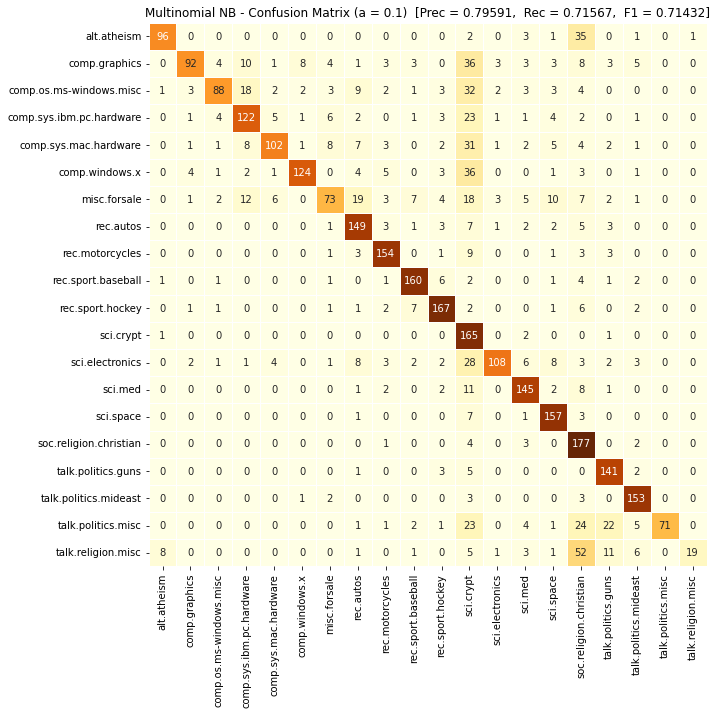

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(metrics.confusion_matrix(y_test, y_predicted),
  xticklabels=textData.target_names, yticklabels=textData.target_names,
  annot=True, cbar=False, cmap='YlOrBr', linewidths=.6, ax=ax, fmt='g')\
  .set_title(f"Multinomial NB - Confusion Matrix (a = {alpha_})\
  [Prec = {np.round(metrics.precision_score(y_test, y_predicted,average='macro'),5)},\
  Rec = {np.round(metrics.recall_score(y_test, y_predicted,average='macro'),5)},\
  F1 = {np.round(metrics.f1_score(y_test, y_predicted,average='macro'),5)}]")